# AIRLINE SENTIMENT ANALYSIS

## BUSINESS OVERVIEW

### INTRODUCTION
The airline industry is highly competitive, and customer satisfaction plays a crucial role in determining the success and reputation of airlines. In today's digital age, social media platforms have become a significant avenue for customers to express their opinions and experiences with airlines. This project aims to develop a comprehensive solution for monitoring, analyzing, and understanding customer sentiment expressed on Twitter regarding various airlines. The project focuses on leveraging natural language processing (NLP) and machine learning techniques to classify tweets into positive, negative, or neutral sentiment categories. By analyzing sentiment, airlines can gain actionable insights to enhance customer satisfaction, identify operational improvements, and effectively manage their brand reputation on Twitter.

### METHODOLOGY
The project will follow a structured methodology encompassing the following steps:
* Data Collection: The data was sourced from [here](https://data.world/socialmediadata/twitter-us-airline-sentiment). It was scraped from February 2015 and contains tweet reviews of different US airline companies.
* Data Preprocessing: Clean and preprocess the tweet data by removing noise, irrelevant information, and performing tasks such as tokenization, stemming, and removing stopwords.
* Sentiment Classification Model: Train a machine learning model (such as a supervised classifier or deep learning model) using the preprocessed dataset to classify tweets into positive, negative, or neutral sentiments. Evaluate the model's performance using appropriate evaluation metrics.
* Real-time Monitoring System: Implement a system that retrieves live tweets related to airlines and applies the sentiment classification model to categorize them in real time. Handle high volume and velocity of incoming tweets efficiently and ensure scalability.
* Insights and Recommendations: Analyze sentiment analysis results to generate actionable insights and recommendations for improving customer satisfaction, addressing pain points, and managing brand reputation effectively.
* Response and Engagement Strategy: Develop a strategy for airlines to respond to negative sentiment and engage with customers in a timely and personalized manner. Implement systems and processes to manage customer feedback, complaints, and turnaround negative experiences into positive ones.

### CHALLENGES

1. Operational Efficiency: Maintaining operational efficiency while dealing with complex logistics, diverse destinations, and a large number of flights is a significant challenge. Ensuring smooth coordination between various departments, minimizing delays, optimizing aircraft utilization, and managing crew schedules are crucial for profitability.
2. Reputation Management in the Digital Age: With the rise of social media, airlines face the challenge of managing their brand reputation effectively. Negative experiences and customer complaints can spread quickly on platforms like Twitter, impacting brand perception. Monitoring, addressing, and managing online sentiment and customer feedback is crucial.
3. Customer Expectations and Satisfaction: Meeting and exceeding customer expectations is a constant challenge in the airline industry. Customers demand personalized experiences, seamless travel processes, on-time performance, and exceptional customer service.


### PROPOSED SOLUTIONS
1. Operational Efficiency:

* Utilize advanced analytics and predictive modeling to optimize scheduling, crew management, and aircraft utilization.
* Implement automated processes and digital solutions to streamline operations and reduce delays.
* Employ real-time data monitoring and analytics to proactively identify and address operational inefficiencie

2. Reputation Management in the Digital Age:

* Implement social media listening and sentiment analysis tools to monitor and manage online sentiment.
* Establish dedicated teams to address customer complaints and engage with customers on social media platforms.
* Actively manage brand reputation by promptly addressing negative sentiment and leveraging positive feedback for advocacy.

3. Customer Expectations and Satisfaction:

* Implement personalized customer experiences through data-driven insights and targeted marketing campaigns.
* Enhance customer service training for staff to deliver exceptional service.
* Leverage sentiment analysis to identify customer pain points and address them promptly.

### PROBLEM STATEMENT

The airline industry is currently facing a notable decrease in customer satisfaction, leading to unfavorable brand perception and diminished customer loyalty. This decline in satisfaction can be attributed to several factors, including flight delays, inadequate customer service, mishandling of luggage, and other operational inefficiencies. As a result, addressing these customer concerns and enhancing the overall brand perception has become a crucial focus for airlines.

### OBJECTIVES

1.  Determine the overall sentiment expressed in tweets related to US airlines. This involves classifying tweets as positive, negative, or neutral to understand the general sentiment of customers towards different airlines.
2. Implement a real-time monitoring system to continuously capture and process tweets related to airlines from Twitter.
3. Generate actionable insights and recommendations based on sentiment analysis to improve customer satisfaction, address pain points, and enhance overall brand reputation.
4. Establish an effective response and engagement strategy to manage negative sentiment, address customer complaints, and foster positive customer experiences.


### SUCCESS METRICS

After modeling, the success metrics for the sentiment analysis on this project includes:

* Accuracy: Measure the accuracy of the sentiment classification model in correctly categorizing tweets into positive, negative, or neutral sentiments. This metric indicates the model's ability to make accurate predictions.

* Precision, Recall, and F1 Score: Calculate precision, recall, and F1 score to assess the model's performance in correctly identifying positive, negative, and neutral sentiments. These metrics provide insights into the model's ability to balance precision (correctly identifying positive/negative sentiments) and recall (identifying all positive/negative sentiments).

## DATA UNDERSTANDING

The data was sourced from [here](https://data.world/socialmediadata/twitter-us-airline-sentiment). It was scraped from February 2015 and contains tweet reviews of different US airline companies.

### Data Preparation

In [103]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px 
import re
import string
import joblib

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc

#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# loading the dataset
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [4]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

Data Types:
_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     i

The dataset has 14640 rows and 20 columns. It also has missing values, with some columns registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the text column needs preprocessing since it contains raw tweets with underscores and nametags.

In [5]:
# Checking for duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('\n' )
print('Duplicates in Unit id column:')
print(df.duplicated(subset='_unit_id').sum())

Duplicates:
0


Duplicates in Unit id column:
0


The dataset has no duplicates.

### EDA

In [6]:
# distribution of airline sentiments

sentiments = df['airline_sentiment'].value_counts(normalize=True)
sentiments

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

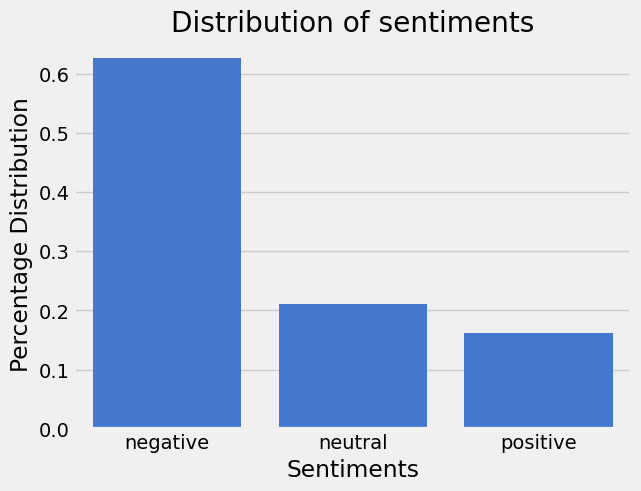

In [7]:
# plot the distribution of sentiments

sns.barplot(x=sentiments.index, y=sentiments.values, color='#3071E7')
plt.xlabel('Sentiments')
plt.ylabel('Percentage Distribution')
plt.title('Distribution of sentiments');


Majority (63%) of all sentiments are negative. Positive sentiments account for only 16% of the dataset.

In [8]:
neg_reason = df['negativereason'].value_counts()
neg_reason

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

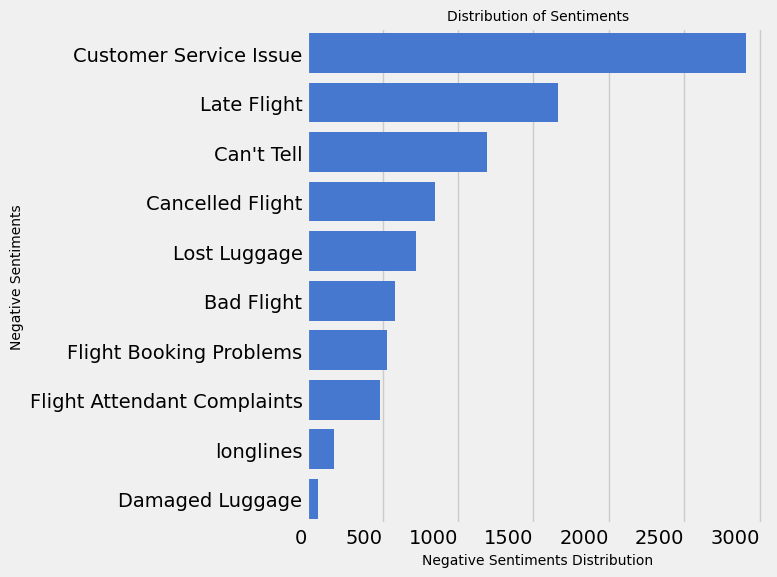

In [9]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed


ax = sns.barplot(y=neg_reason.index, x=neg_reason.values, color='#3071E7', orient='h')
plt.ylabel('Negative Sentiments'). set_size(10)
plt.xlabel('Negative Sentiments Distribution'). set_size(10)
plt.title('Distribution of Sentiments'). set_size(10)

# Organize the x-labels
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

From the reasons given in the data, there are 10 painpoints. The top being customer satisfaction issues followed by late flight and cancelled flight. A significant number of the reviews could not be classified to the exact painpoint.

In [10]:
# distribution of airlines

airlines = df['airline'].value_counts()
airlines

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

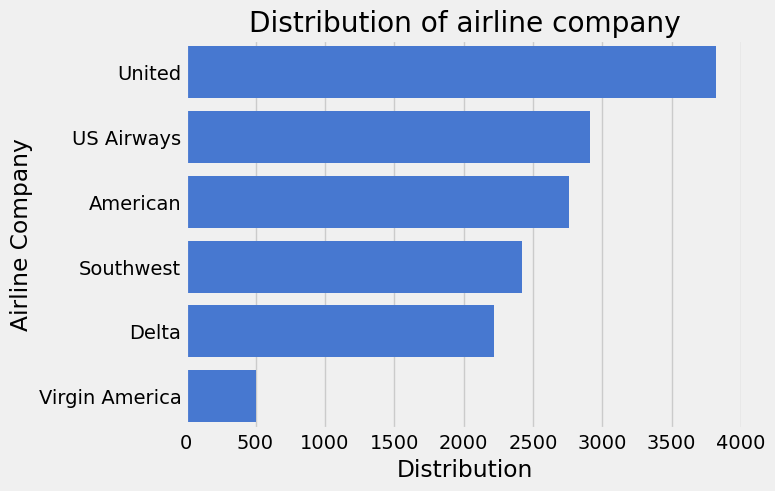

In [11]:
# plot the distribution of airlines

sns.barplot(y=airlines.index, x=airlines.values, color='#3071E7', orient='h')
plt.ylabel('Airline Company')
plt.xlabel('Distribution')
plt.title('Distribution of airline company');

From the graph above we see that the United Airlines has the highest number of reviews followed by US Airways and American airways.

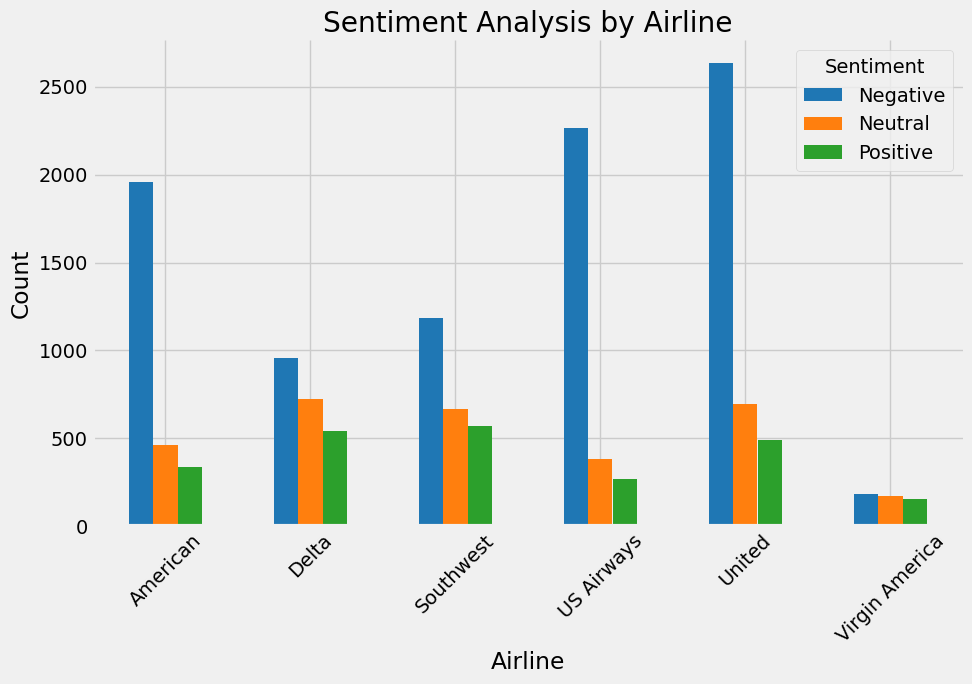

In [12]:
# Group the sentiment by airline
sentiment_by_airline = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Set the colors for each sentiment category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the grouped data
ax = sentiment_by_airline.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Analysis by Airline')
plt.xticks(rotation=45)

# Set legend
legend_labels = ['Negative', 'Neutral', 'Positive']
plt.legend(title='Sentiment', labels=legend_labels, loc='upper right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

From the plot above, United, US Airways and American Airways have skyrocketing number of negative sentiments. Virgin America has an almost even distribution of negative, positive and neutral sentiments.

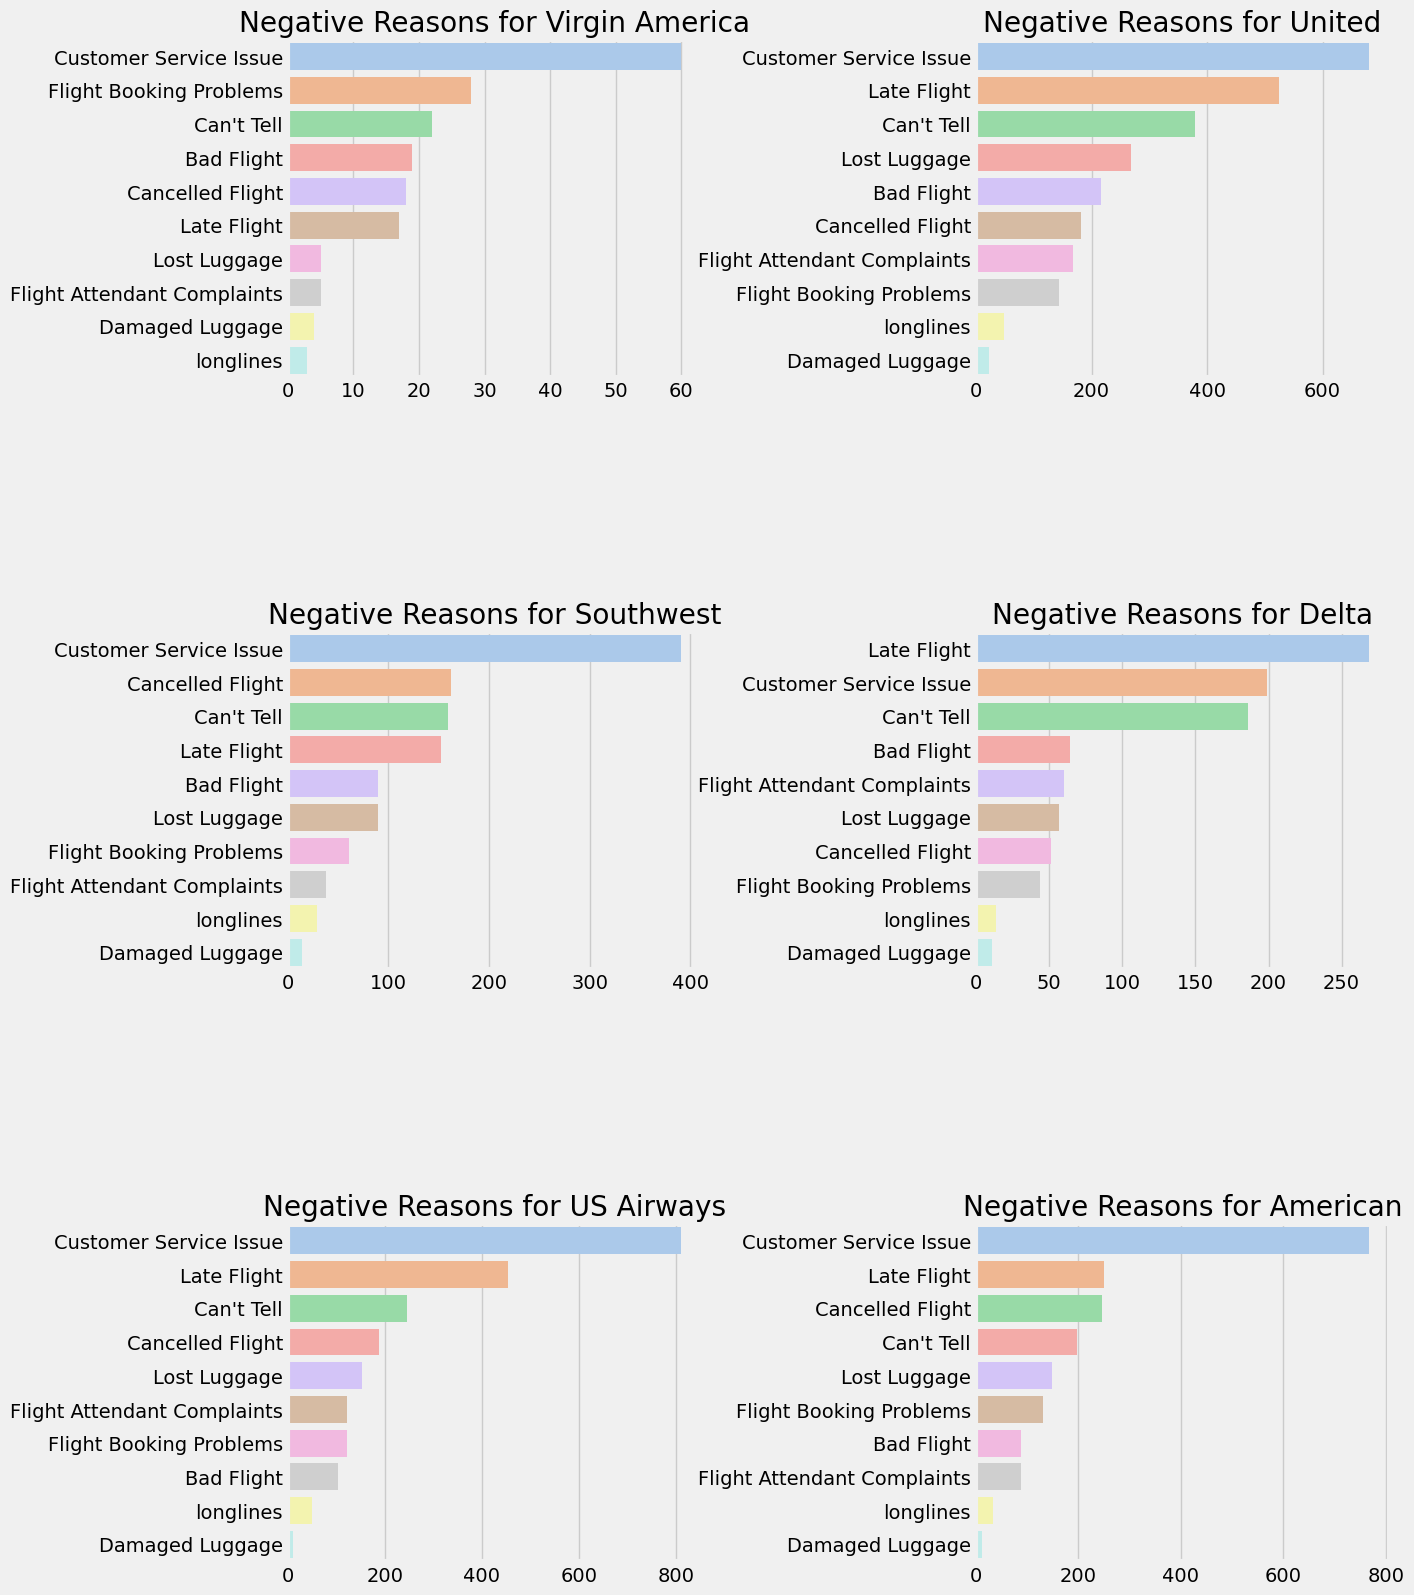

In [13]:
def plot_reason(airline, ax):
    airline_data = df[df['airline'] == airline]
    reason_count = airline_data['negativereason'].value_counts()
    sns.barplot(y=reason_count.index, x=reason_count.values, palette='pastel', ax=ax, orient='h')
    ax.set_title('Negative Reasons for ' + airline)

# Get unique airlines
airlines = df['airline'].unique()

# Calculate number of rows and columns for subplots
num_rows = 3
num_cols = (len(airlines) + 1) // 3  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
fig.tight_layout(pad=11.5) # Increase spacing between subplots

# Iterate over airlines and plot reasons
for i, airline in enumerate(airlines):
    row = i // num_cols
    col = i % num_cols
    plot_reason(airline, axes[row][col])

# Remove empty subplots if the number of airlines is odd
if len(airlines) % 2 != 0:
    fig.delaxes(axes[num_rows-1][num_cols-1])

# Show the subplots
plt.show()

There is a general trend in customers' negative setiments across all airlines. The top three being customer service issues for all airlines except Delta airlines which had late flight as the leading challenge. Late flight comes second and cancelled flight comes third.

### **DATA PREPROCESSING**

### A. **Airline data preprocessing**

### Feature Selection

In [14]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
tweet_df = df[['airline_sentiment', 'text']]
tweet_df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


From our data overview, the text column contains raw tweets with underscores and nametags which will need to be parsed.

In [16]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df["text"] = tweet_df["text"].apply(remove_nametags)
tweet_df.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [17]:
# remove numbers
num_pattern = r'[0-9]'
tweet_df['text'] = tweet_df['text'].replace(to_replace=num_pattern, value='', regex=True)
tweet_df.head(10)

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that ...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [18]:
# remove punctuations
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# change to lowercase
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.lower())
tweet_df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ûïear wor...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntûbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [19]:
#remove emoticons
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

tweet_df["text"] = tweet_df["text"].apply(remove_emojis)


In [20]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string

tweet_df["text"] = tweet_df["text"].apply(remove_non_standard_char)

tweet_df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ear worm w...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [21]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
tweet_df['text'] = tweet_df['text'].str.replace(urlpattern, '')
tweet_df.head()

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


In [22]:
# list stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would','youve']

In [23]:
def remove_stopwords(words):
    """A simple function to remove stopwords from a string"""
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df['text'] = tweet_df['text'].apply(remove_stopwords)
# Print the first 5 rows of the new column
tweet_df.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus added commercials experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


Stopwords occur frequently in texts but provide little semantic value. By removing them, we eliminate unnecessary noise and focus on the more important words, thus improving the efficiency and effectiveness of our models. We customized our stopword list to include stopwords which we felt negates the sentiments.

#### Stemming

In [24]:
stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()
def stem_words(review):
    """A function to stem words in a review text"""
    stem_words = []
    for word in review.split():
        stem_word = stemmer.stem(word)
        stem_words.append(stem_word)
    return " ".join(stem_words)

tweet_df["text"] = tweet_df["text"].apply(stem_words)
tweet_df.head(10)

,airline_sentiment,text
0,neutral,said
1,positive,plus ad commerci experi tacki
2,neutral,didnt today must mean need take anoth trip
3,negative,realli aggress blast obnoxi entertain guest fa...
4,negative,realli big bad thing
5,negative,serious pay flight seat didnt play realli bad ...
6,positive,yes near everi time fli vx ear worm wont go away
7,neutral,realli miss prime opportun men without hat parodi
8,positive,well didntbut
9,positive,amaz arriv hour earli your good


In [25]:
def impactful_words_positive(review, num_words=2):
    """Function that gets the most impactful words in positive reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words =  sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)

In [26]:
def impactful_words_negative(review, num_words=2):
    """Function that gets the most impactful words in negative reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    impactful_words = [(word, score) for word, score in scores.items() if score < 0]
    sorted_words =  sorted(impactful_words, key=lambda x: np.abs(x[1]), reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)
    

In [27]:
# Subsetting the sentiments into positive, negative and neutral.
neg_df = tweet_df[tweet_df['airline_sentiment']=='negative']
pos_df = tweet_df[tweet_df['airline_sentiment']=='positive']
neu_df = tweet_df[tweet_df['airline_sentiment']=='neutral']

In [28]:
pos_df['impactful_words'] = pos_df['text'].apply(impactful_words_positive)
neg_df['impactful_words'] = neg_df['text'].apply(impactful_words_negative)

In [29]:
pos_df.head()

,airline_sentiment,text,impactful_words
1,positive,plus ad commerci experi tacki,"[plus, ad]"
6,positive,yes near everi time fli vx ear worm wont go away,"[yes, near]"
8,positive,well didntbut,"[well, didntbut]"
9,positive,amaz arriv hour earli your good,"[good, amaz]"
11,positive,lt pretti graphic much better minim iconographi,"[better, lt]"


In [30]:
neg_df.head()

,airline_sentiment,text,impactful_words
3,negative,realli aggress blast obnoxi entertain guest fa...,[aggress]
4,negative,realli big bad thing,[bad]
5,negative,serious pay flight seat didnt play realli bad ...,"[bad, pay]"
15,negative,sfopdx schedul still mia,[mia]
17,negative,flew nyc sfo last week couldnt fulli sit seat ...,[]


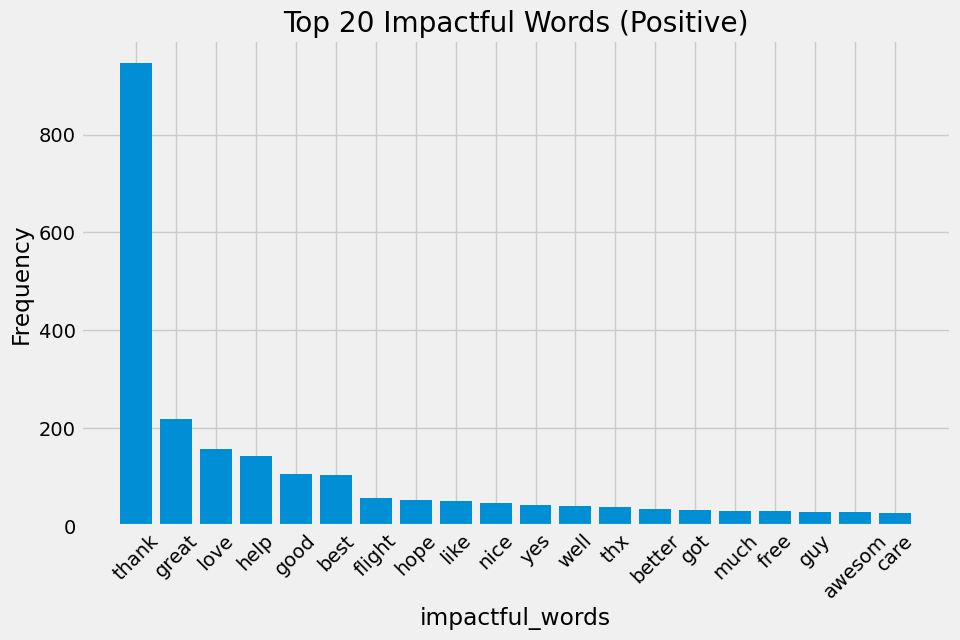

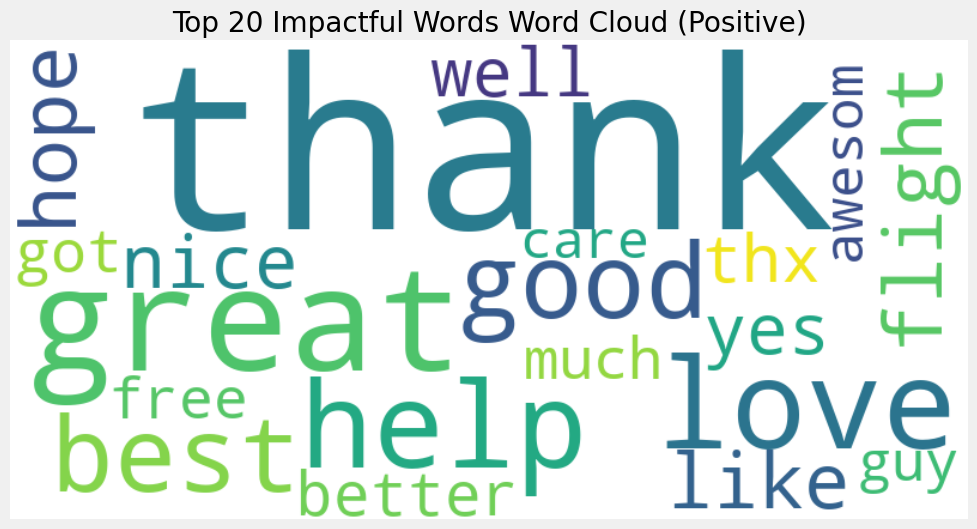

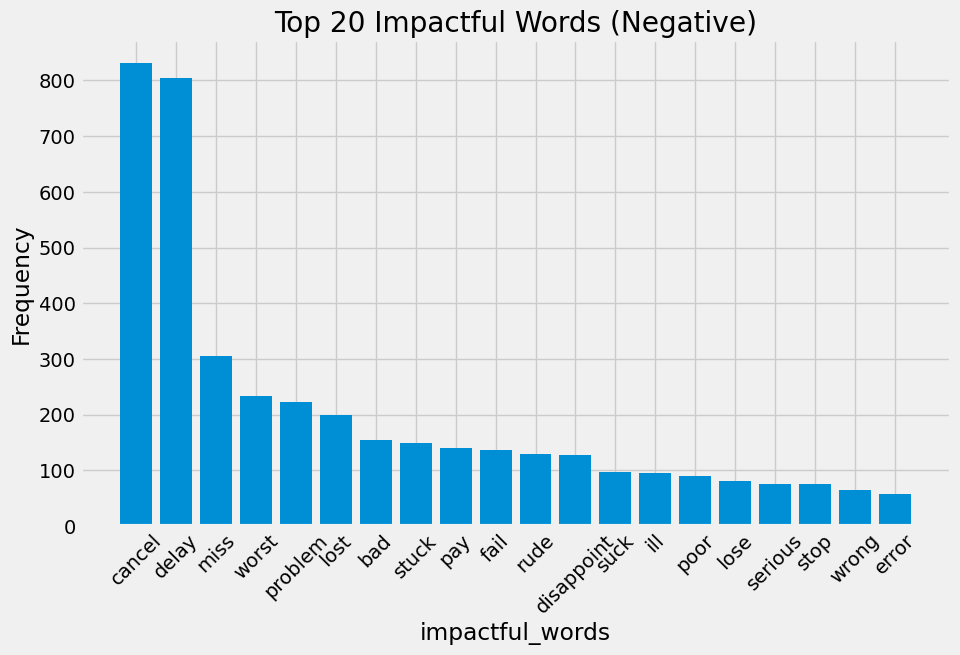

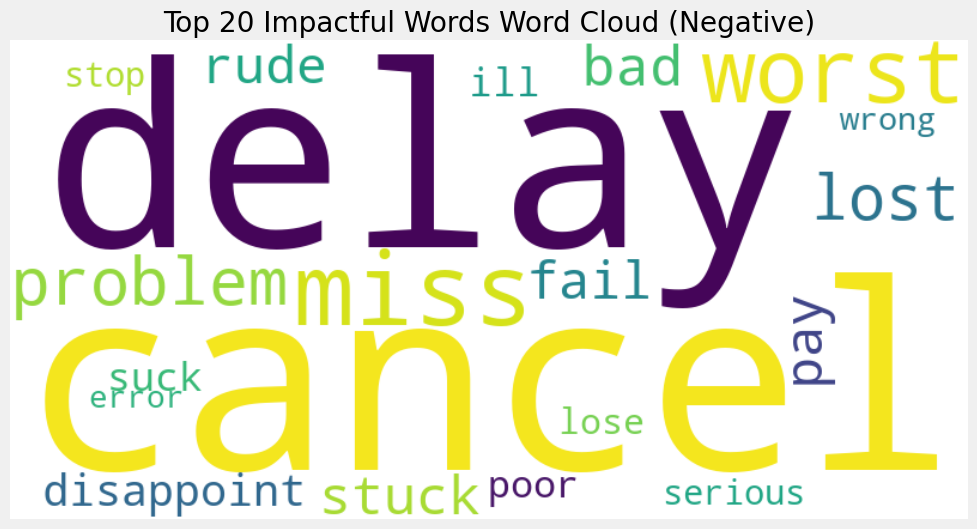

In [31]:
def plot_top_words(df, category, num_words=20, column='impactful_words'):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df[column].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')


From our sentiment analysis, we came up with the plots and wordclouds of the most impactful words to our reviews being negative or positive. From this we can see that cancelled, delayed and missed flights are the main painpoints.

### B. **Churn data preprocessing**

In [32]:
# loading the churn dataset
data = pd.read_csv("text.csv")
data.head()

,churn,chat_log
0,no,Customer: Text.\nTelCom Agent: What's the mini...
1,no,Customer: Just voice.\nTelCom Agent: And how m...
2,no,NaN
3,no,Customer: I can't upgrade my voice package I'm...
4,no,Customer: I'm looking to upgrade my contract t...


In [33]:
#Dropping null values
data.dropna(inplace=True)

In [34]:
# transforming our labels to numeric values
data["churn"] = data["churn"].map({"no": 0, "yes": 1})
data.head()

,churn,chat_log
0,0,Customer: Text.\nTelCom Agent: What's the mini...
1,0,Customer: Just voice.\nTelCom Agent: And how m...
3,0,Customer: I can't upgrade my voice package I'm...
4,0,Customer: I'm looking to upgrade my contract t...
6,0,Customer: I would like to upgrade my voice and...


In [35]:
def remove_nametags_(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if ":" not in word:
            clean_words.append(word)
    return " ".join(clean_words)
data["chat_log"] = data["chat_log"].apply(remove_nametags_)

In [36]:
# removing numbers from chat logs
num_pattern = r'[0-9]'
data['chat_log'] = data['chat_log'].replace(to_replace=num_pattern, value='', regex=True)

In [37]:
# removing punctuations, non standard characters and converting to lower case
data['chat_log'] = data['chat_log'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
data['chat_log'] = data['chat_log'].apply(lambda x: x.lower())
data["chat_log"] = data["chat_log"].apply(remove_non_standard_char)

In [96]:
# removing stopwords from a sentence
stop_words = stop_words + ["telcom", "per", "text", "texts", "call", "calls", 'service', 'internet', 'calling',
                           'okay', 'upgrade', 'contract', 'phone', 'phone', 'servicing', 'serviced', 
                           'number, upgrading', 'upgraded', 'services', 'upgrades']
data['chat_log'] = data['chat_log'].apply(remove_stopwords)

In [97]:
# removing two letter words from chat log
def remove_two_letter_words(text):
    """removes two letter words from chat log
    """
    pattern = r'\b\w{1,2}\b'
    matches = re.findall(pattern, text)
    filtered_text = re.sub(pattern, '', text)
    return filtered_text

data['chat_log'] = data['chat_log'].apply(remove_two_letter_words)

In [98]:
# stemming 
data["chat_log"] = data["chat_log"].apply(stem_words)
data.head()

,churn,chat_log
0,0,minimum new month month expen yes see data are...
1,0,voic much ill pay month next month thank belin...
3,0,cant upgrad voic packag verizon explain unabl ...
4,0,look upgrad singtel standard plan think benefi...
6,0,like upgrad voic data packag one like upgrad v...


In [99]:
# Subsetting our chat log into churned and not churned
# churn_df = data[data['churn']== 1]
# nochurn_df = data[data['churn']== 0]

In [100]:
def generate_word_cloud(data, label):
    """A function to generate a word cloud for a given label in the dataset."""
    review = " ".join(data[data["churn"] == label].chat_log)
    word_cloud = WordCloud(background_color='white', width=1600,\
                           height=800, max_words=2000, min_font_size=5).generate(review)
    plt.figure(figsize=(12,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

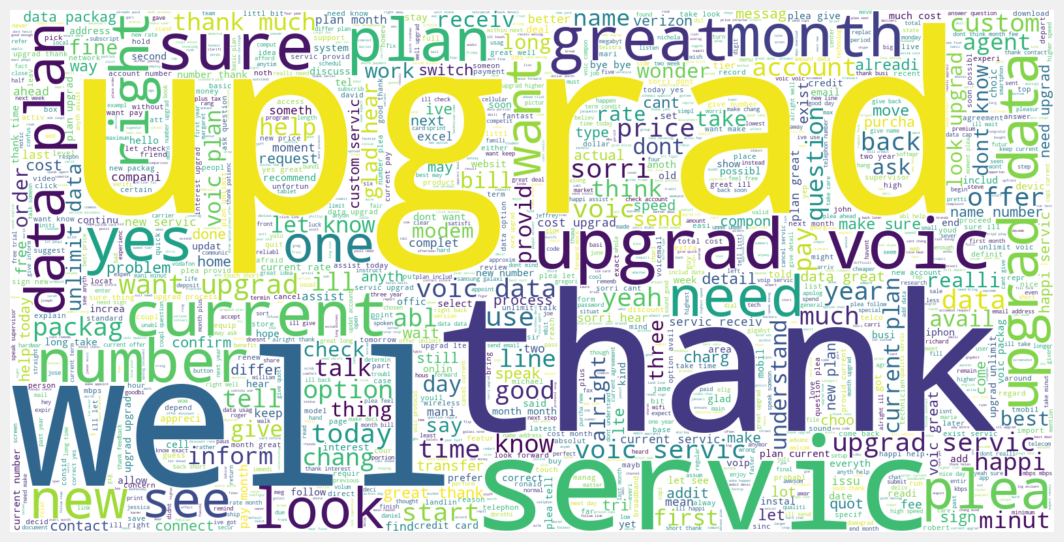

In [101]:
#generate wordcloud for those who did not churn
generate_word_cloud(data, 0)

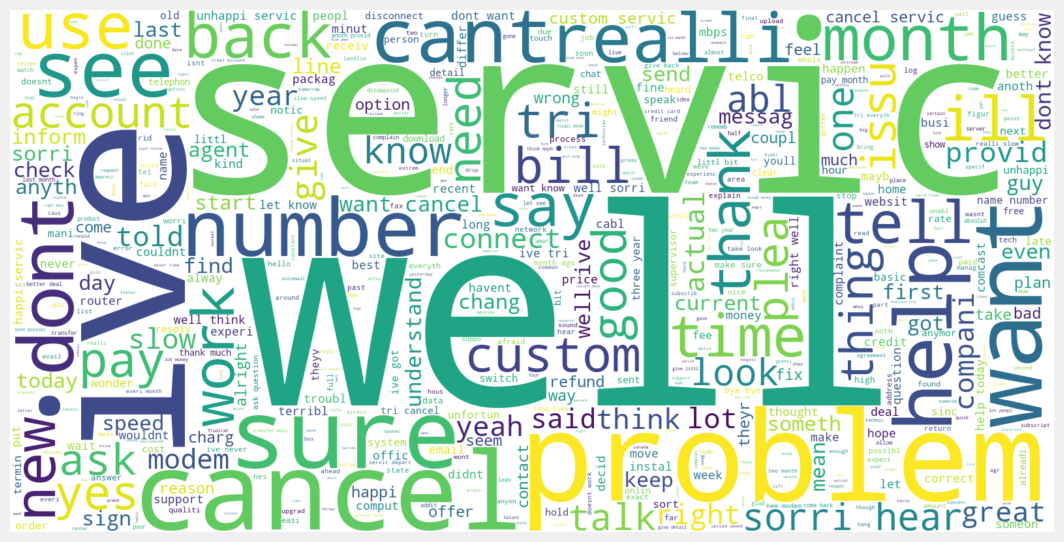

In [102]:
#generate wordcloud for those who churned
generate_word_cloud(data, 1)

### **MODELLING**



Splitting
We split the data into train and test sets for model evaluation 
Vectorizing

Fitting

- Gaussian Naive Bayes
- Decision Classifier
- Random Forest Classifier

In [42]:
def train_test(data, random_state=42):
    # Function to split the data into train and test set (0.75, 0.25) split.
    train, test = train_test_split(data, random_state=random_state)
    return train, test

In [43]:
# split the data into train and test sets
neg_train, neg_test = train_test(neg_df)
pos_train, pos_test = train_test(pos_df)
neu_train, neu_test = train_test(neu_df)

In [44]:
neg_train.shape

(6883, 3)

In [45]:
# joining impactful_words in train and test data to a single string
neg_train["impactful_words"] = neg_train["impactful_words"].apply(lambda x: " ".join(x))
neg_test["impactful_words"] = neg_test["impactful_words"].apply(lambda x: " ".join(x))
pos_train["impactful_words"] = pos_train["impactful_words"].apply(lambda x: " ".join(x))
pos_test["impactful_words"] = pos_test["impactful_words"].apply(lambda x: " ".join(x))

In [46]:
# concatenate the three dataframess into two dataframes, train and test
train = pd.concat([neg_train, pos_train, neu_train])
test = pd.concat([neg_test, pos_test, neu_test])

In [47]:
def replace(text):
    """Replaces empty strings with np.NaN where we did not have impactful words"""
    if text == "":
        return np.NaN
    else:
        return text
        
train["impactful_words"] = train["impactful_words"].apply(replace)
test["impactful_words"] = test["impactful_words"].apply(replace)
train.head()

,airline_sentiment,text,impactful_words
10160,negative,one come line hold hour u help provid conf code,NaN
4846,negative,custom servic rather inconsist inform,NaN
3423,negative,flight delay minut ord plane didnt food fix fu...,dumb delay
237,negative,today flight palm spring ca jfk ny cancel flightl,cancel
10707,negative,year naval servic run travel depart command,NaN


In [48]:
# filling the missing values with the cant tell string
train.fillna("cant tell", inplace=True)
test.fillna("cant tell", inplace=True)

In [49]:
# vectorizing our data with TFIDF
# vectorizing sentiments
vectorizer_sents = TfidfVectorizer(max_features=2000)
X_train_sents = vectorizer_sents.fit_transform(train["text"])
X_test_sents = vectorizer_sents.transform(test["text"])

# vectorizing impactful words
vectorizer_impacts = TfidfVectorizer()
X_train_impacts = vectorizer_impacts.fit_transform(train["impactful_words"])
X_test_impacts = vectorizer_impacts.transform(test["impactful_words"])

# putting the matrices into  dataframes, X_train and X_test
X_train_sents = pd.DataFrame(X_train_sents.todense())
X_train_impacts = pd.DataFrame(X_train_impacts.todense())

X_test_sents = pd.DataFrame(X_test_sents.todense())
X_test_impacts = pd.DataFrame(X_test_impacts.todense())

X_train = pd.concat([X_train_sents, X_train_impacts], axis=1)
X_test = pd.concat([X_test_sents, X_test_impacts], axis=1)

# splitting our data into training and testing set labels
y_train = train["airline_sentiment"]
y_test = test["airline_sentiment"]

In [50]:
X_train.shape

(10979, 2987)

In [51]:
def evaluation(y_true, y_pred):
    """A simple function to print evaluation metrics of a model"""
    print(f"The model has an accuracy score of {accuracy_score(y_true, y_pred):.2%}")
    print("-----------------------------------------------")
    print(f"The model's recall rate is {recall_score(y_true, y_pred, average='weighted'):.2%}")
    print("-----------------------------------------------")
    print(f"The model's precision is {precision_score(y_true, y_pred, average='weighted'):.2%}")
    print("-----------------------------------------------")
    print(f"The model's f1_score is {f1_score(y_true, y_pred,average='weighted'):.2%}")
    print("-----------------------------------------------")

#### Naive Bayes Classifier

In [52]:
# Instanciating a GaussianNB classifier
naive_clf = GaussianNB()

# fit the model
naive_clf.fit(X_train, y_train)

# predict 
test_preds_naive = naive_clf.predict(X_test)

In [53]:
# crossvalidating 
scores = cross_val_score(naive_clf, X_train, y_train, cv=5)
scores.mean()

0.7411414001850538

In [54]:
# Evaluate the performance of the naive model on the test set
evaluation(y_test, test_preds_naive)

The model has an accuracy score of 73.94%
-----------------------------------------------
The model's recall rate is 73.94%
-----------------------------------------------
The model's precision is 84.29%
-----------------------------------------------
The model's f1_score is 75.54%
-----------------------------------------------


#### Decision Tree Classifier

In [55]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

test_preds = clf.predict(X_test)
train_preds = clf.predict(X_train)

In [56]:
# crossvalidate the training set
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.8247562974304078

In [57]:
# evaluate the model on the test dataset
evaluation(y_test, test_preds)

The model has an accuracy score of 82.93%
-----------------------------------------------
The model's recall rate is 82.93%
-----------------------------------------------
The model's precision is 82.85%
-----------------------------------------------
The model's f1_score is 82.86%
-----------------------------------------------


#### Random Forest Classifier

In [64]:
# create the model 
rf_model = RandomForestClassifier(random_state=42)

# fit model
rf_model.fit(X_train, y_train)

# predict on test data
test_predictions_rf = rf_model.predict(X_test)

#predict on train data
train_predictions_rf = rf_model.predict(X_train)


In [65]:
# cross validation for random forest
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
scores.mean()

0.8627378418412437

In [66]:
# evaluate random forest algorithm on test set
evaluation(y_test, test_predictions_rf)

The model has an accuracy score of 86.51%
-----------------------------------------------
The model's recall rate is 86.51%
-----------------------------------------------
The model's precision is 86.46%
-----------------------------------------------
The model's f1_score is 86.17%
-----------------------------------------------


In [61]:
X_test.shape

(3661, 2987)

#### Tuned random forest

In [67]:
# tuned_rf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']

# }
# rf_tree = GridSearchCV(tuned_rf, param_grid, cv=5)

# rf_tree.fit(X_train, y_train)

# rf_tree.best_params_

# opening our pickle model
with open('random_forest.pkl', 'rb') as f:
    tuned_rf = joblib.load(f)

# making predictions on our test data
tuned_preds = tuned_rf.predict(X_test)


In [68]:
evaluation(y_test, tuned_preds)

The model has an accuracy score of 85.96%
-----------------------------------------------
The model's recall rate is 85.96%
-----------------------------------------------
The model's precision is 85.71%
-----------------------------------------------
The model's f1_score is 85.60%
-----------------------------------------------


#### Final sentiment classifier model

In [106]:
# evaluate random forest algorithm on test set
evaluation(y_test, test_predictions_rf)

The model has an accuracy score of 86.51%
-----------------------------------------------
The model's recall rate is 86.51%
-----------------------------------------------
The model's precision is 86.46%
-----------------------------------------------
The model's f1_score is 86.17%
-----------------------------------------------


Our final and preferred model is the untuned random forest classifier which performed better compared to other models with an accuracy of 86.51 percent. This is a remarkable improvement from the baseline model by approximately 13%.

### **Churn modelling**

In [110]:
# splitting the data into train and test sets
X_tr, X_te, y_tr, y_te = train_test_split(data["chat_log"], data["churn"], random_state=42)

In [111]:
# vectorizing our data
vect = TfidfVectorizer(max_features=500)
X_tr_1 = vect.fit_transform(X_tr)
X_te_1 = vect.transform(X_te)

In [112]:
# instanciating our model and fitting it to our training data.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_tr_1, y_tr)
rf_prds = rf.predict(X_te_1)

In [113]:
# evaluating our churn model on our test set
evaluation(y_te, rf_prds)

The model has an accuracy score of 96.21%
-----------------------------------------------
The model's recall rate is 96.21%
-----------------------------------------------
The model's precision is 96.30%
-----------------------------------------------
The model's f1_score is 95.99%
-----------------------------------------------


The churn model accuracy score in test data is 96 percent which shows that it is a good model that can be used to predict if a customer(commuter) churned or not in our airline dataset.

In [80]:
airline_data = pd.concat([train, test])
airline_churn = vect.transform(airline_data["text"])
churn_preds = rf.predict(airline_churn)
churn_series = pd.Series(churn_preds, index=airline_data.index, name="churn")

In [81]:
nw_airline_data = pd.concat([airline_data, churn_series], axis=1)
nw_airline_data

,airline_sentiment,text,impactful_words,churn
10160,negative,one come line hold hour u help provid conf code,cant tell,0
4846,negative,custom servic rather inconsist inform,cant tell,0
3423,negative,flight delay minut ord plane didnt food fix fu...,dumb delay,0
237,negative,today flight palm spring ca jfk ny cancel flightl,cancel,1
10707,negative,year naval servic run travel depart command,cant tell,0
...,...,...,...,...
11954,neutral,love dm twitter app say your not follow cant,cant tell,0
12629,neutral,travel auh iad via etihad iad dfw via aa abl r...,cant tell,0
9977,neutral,got transf dividend milesne chang flight grand...,cant tell,0
2216,neutral,request upgrad ewr bom flight end may mile cop...,cant tell,0


In [82]:
nw_airline_data['churn'].value_counts(normalize=True)

0    0.895492
1    0.104508
Name: churn, dtype: float64

In [83]:
# subset the customers that churned
nw_airline_data[(nw_airline_data['churn'] == 1) & (nw_airline_data['airline_sentiment'] == 'neutral')][:5]

,airline_sentiment,text,impactful_words,churn
14502,neutral,flight columbus ohio dalla texa cancel flight,cant tell,1
11307,neutral,differ cancel flight reflight book problem hel...,cant tell,1
4990,neutral,updat flight get cancel flight dal connect fli...,cant tell,1
1299,neutral,sit middl first time hope work well,cant tell,1
12059,neutral,flight got cancel flightl grk dfw lex tomorrow...,cant tell,1
